In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime

In [2]:
CTD = pn.read_csv("~/Desktop/NYB Indicators/cold_pool/combined.CTD.datasheets-2018-2020.csv")

In [3]:
CTD

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,CTD.Depth..m.,Temp...C.
0,1,NYOS1807,0018-07-14,1,1.1,1,40.958537,40.57591,71.820132,71.49377,113.0,NaN
1,2,NYOS1807,0018-07-14,1,1.1,2,40.958537,40.57591,71.820132,71.49377,50.0,NaN
2,3,NYOS1807,0018-07-14,1,1.1,3,40.958537,40.57591,71.820132,71.49377,2.0,NaN
3,4,NYOS1807,0018-07-14,2,1.2,1,40.417600,40.41412,71.430810,71.42659,62.3,NaN
4,5,NYOS1807,0018-07-14,2,1.2,2,40.417600,40.41412,71.430810,71.42659,62.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
617,618,NYOS2002,0020-02-10,13,6.2,62,40.101940,40.10348,73.195510,73.19446,10.0,6.435
618,619,NYOS2002,0020-02-10,13,6.2,63,40.101940,40.10348,73.195510,73.19446,2.0,6.43
619,620,NYOS2002,0020-02-10,14,6.1,64,40.307320,40.31049,73.266940,73.26432,15.0,5.51
620,621,NYOS2002,0020-02-10,14,6.1,65,40.307320,40.31049,73.266940,73.26432,10.0,5.51


In [4]:
# parse multiple date formats

def try_parsing_date(text):
    for fmt in ('00%y-%m-%d', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [5]:
year = np.empty(622)
month = np.empty(622)
for i in range(622):
    year[i] = try_parsing_date(str(CTD['Date'][i])).year
    month[i] = try_parsing_date(str(CTD['Date'][i])).month

In [6]:
CTD['Year'] = year
CTD['Month'] = month

In [7]:
CTD = CTD.rename(columns={'CTD.Depth..m.':'Depth','Temp...C.':'Temp'})

In [42]:
CTD[CTD['Station']=='LIS_ARIG']

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,Depth,Temp,Year,Month
300,301,NYOS1905,0019-05-29,1,LIS_ARIG,108,40.57619,40.57668,73.34698,73.34764,14.0,11.415,2019.0,5.0
301,302,NYOS1905,0019-05-29,1,LIS_ARIG,209,40.57619,40.57668,73.34698,73.34764,8.0,15.249,2019.0,5.0
302,303,NYOS1905,0019-05-29,1,LIS_ARIG,30,40.57619,40.57668,73.34698,73.34764,0.0,15.522,2019.0,5.0
556,557,NYOS2002,0020-02-04,1,LIS_ARIG,1,40.57589,40.57581,73.34710,73.34668,10.0,3.831,2020.0,2.0
557,558,NYOS2002,0020-02-04,1,LIS_ARIG,2,40.57589,40.57581,73.34710,73.34668,2.0,3.835,2020.0,2.0


In [44]:
CTD['Temp'][CTD['Temp']=='?']=np.nan


<ipython-input-44-dac68114e812>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CTD['Temp'][CTD['Temp']=='?']=np.nan


In [43]:
CTD['Temp'] = CTD['Temp'].astype(float)
CTD['Depth'] = CTD['Depth'].astype(float)


In [11]:
CTD2018 = CTD[CTD['Year']==2018]
CTD2018['Month'].unique()

array([7.])

In [12]:
CTD2018['Cast'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-15-3e202520d7ce>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD

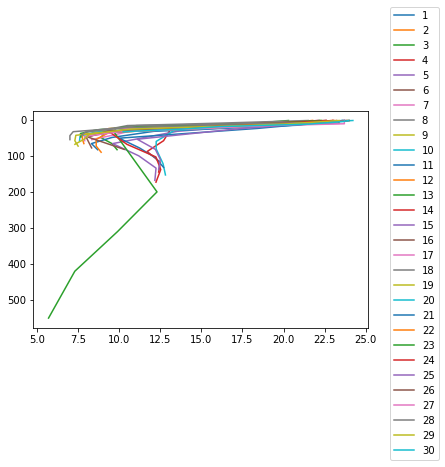

In [15]:
x=np.empty(30)
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    plt.plot(ctd['Temp'],ctd['Depth'])
    
plt.legend(CTD2018['Cast'].unique(),bbox_to_anchor=(1.05, 1.5), loc='upper left')
plt.gca().invert_yaxis()

In [14]:
# find the minimum temp of each cast
castmin = np.empty(30)
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    castmin[i-1] = np.nanmin(ctd['Temp'])

<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-14-4790cf937371>:5: RuntimeWarning: All-NaN axis encountered
  castmin[i-1] = np.nanmin(ctd['Temp'])
<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input-14-4790cf937371>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ctd = CTD2018[CTD['Cast'] == i]
<ipython-input

In [37]:
castmin
#only look at profiles where the temperature went below 10C

array([    nan,  9.13  ,  8.87  , 11.7   ,  9.601 ,  7.9717,  8.33  ,
        9.7   ,  8.917 ,  7.5859,  8.31  ,  7.76  ,  7.64  ,  9.32  ,
       12.0979,  9.65  ,  8.7   ,  7.    ,  7.3   , 12.25  , 10.    ,
        8.6   ,  5.7   ,  9.39  , 11.1   ,  8.1   ,  7.9   ,  7.712 ,
        7.3039, 10.243 ])

In [39]:
np.unique(CTD['Station'])

array(['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '2.1', '2.2', '2.3',
       '2.4', '2.5', '2.6', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6',
       '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '6.1', '6.2', '6.3', '6.4', '6.5',
       '6.6', '7.1', '7.2', '7.3', '7.4', '7.5', '7.6', 'LIS-WLIS',
       'LIS_ARIG', 'LIS_WLIS'], dtype=object)

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,Depth,Temp,Year,Month


In [ ]:
# interpolate to the 10 degree isotherm
x = CTD['Temp']
xp = CTD['Depth']
y = 10

yp = np.interp(x,xp,y)

In [ ]:
for i in CTD2018['Cast'].unique():
    ctd = CTD2018[CTD['Cast'] == i]
    plt.scatter(np.float(ctd[]),ctd['CTD.Depth..m.'])

In [ ]:
np.float(CTD2018['Temp...C.'][167])

In [128]:
def depth10(year, month):
    ctd_year = CTD[CTD['Year']==year]
    ctd_monthyr = ctd_year[ctd_year['Month']==month]
    d10vector = np.empty(len(np.unique(ctd_monthyr['Station'])))
    d10lat = np.empty(len(np.unique(ctd_monthyr['Station'])))
    d10lon = np.empty(len(np.unique(ctd_monthyr['Station'])))
    a = 0
    for i in np.unique(ctd_monthyr['Station']):
        ctd_stn = ctd_monthyr[ctd_monthyr['Station'] == i]
        if np.min(ctd_stn['Temp']) > 10 or np.max(ctd_stn['Temp']) < 10:
            d10vector[a]=np.nan
            d10lon[a]=np.min(ctd_stn['Long.Start'])
            d10lat[a]=np.min(ctd_stn['Lat.Start'])
            a=a+1
        else:
            x = 10
            xp = ctd_stn['Temp']
            y = ctd_stn['Depth']
            yp = np.interp(x,xp,y)
            d10vector[a]=yp
            d10lon[a]=np.min(ctd_stn['Long.Start'])
            d10lat[a]=np.min(ctd_stn['Lat.Start'])
            a=a+1
    return d10vector, d10lat, d10lon
            

In [129]:
np.min(ctd_stn['Long.Start'])

71.443492

In [147]:
[cp, cplat, cplon] = depth10(2018,7)
#plt.contourf(cplon,cplat,z)
[lon,lat,d10] = np.meshgrid(cplon, cplat, cp)

In [154]:
np.shape(d10)
lat[:,:,0]

array([[40.958537, 40.958537, 40.958537, 40.958537, 40.958537, 40.958537,
        40.958537, 40.958537, 40.958537, 40.958537, 40.958537, 40.958537,
        40.958537, 40.958537, 40.958537, 40.958537, 40.958537, 40.958537,
        40.958537, 40.958537, 40.958537, 40.958537, 40.958537, 40.958537,
        40.958537, 40.958537, 40.958537, 40.958537, 40.958537, 40.958537],
       [40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  ,
        40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  ,
        40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  ,
        40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  ,
        40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  , 40.4176  ],
       [40.086642, 40.086642, 40.086642, 40.086642, 40.086642, 40.086642,
        40.086642, 40.086642, 40.086642, 40.086642, 40.086642, 40.086642,
        40.086642, 40.086642, 40.086642, 40.086642, 40.086642, 40.086642,
        40.086642, 40.086642, 40.086

In [99]:
year = 2018
month = 7
ctd_year = CTD[CTD['Year']==year]
ctd_monthyr = ctd_year[ctd_year['Month']==month]

d10vector = np.empty(len(np.unique(ctd_monthyr['Station'])))
i='1.5'
ctd_stn = ctd_monthyr[ctd_monthyr['Station'] == i]
ctd_stn
a=0
if np.min(ctd_stn['Temp']) > 10 or np.max(ctd_stn['Temp']) < 10:
    d10vector[a]=np.nan
    a=a+1


In [80]:
if np.min(ctd_stn['Temp']) > 10 or np.max(ctd_stn['Temp']) < 10:
    print('bad')

In [84]:
x = 10
xp = ctd_stn['Temp']
y = ctd_stn['Depth']
yp = np.interp(x,xp,y)

In [85]:
yp

49.46557770394979

In [86]:
xp

268     5.966
269     6.236
270     7.371
271    10.080
272    12.100
Name: Temp, dtype: float64

In [88]:
y

268     2.00
269    15.00
270    30.26
271    50.05
272    70.00
Name: Depth, dtype: float64

In [100]:
ctd_monthyr

,Unnamed: 0,CruiseID,Date,Cast,Station,Bottle.No,Lat.Start,Lat.End,Long.Start,Long.End,Depth,Temp,Year,Month
0,1,NYOS1807,0018-07-14,1,1.1,1,40.958537,40.57591,71.820132,71.49377,113.0,NaN,2018.0,7.0
1,2,NYOS1807,0018-07-14,1,1.1,2,40.958537,40.57591,71.820132,71.49377,50.0,NaN,2018.0,7.0
2,3,NYOS1807,0018-07-14,1,1.1,3,40.958537,40.57591,71.820132,71.49377,2.0,NaN,2018.0,7.0
3,4,NYOS1807,0018-07-14,2,1.2,1,40.417600,40.41412,71.430810,71.42659,62.3,NaN,2018.0,7.0
4,5,NYOS1807,0018-07-14,2,1.2,2,40.417600,40.41412,71.430810,71.42659,62.3,NaN,2018.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,168,NYOS1807,0018-07-20,30,6.1,2,40.225800,40.22600,73.271300,73.27370,26.0,13.793,2018.0,7.0
168,169,NYOS1807,0018-07-20,30,6.1,3,40.225800,40.22600,73.271300,73.27370,19.0,16.062,2018.0,7.0
169,170,NYOS1807,0018-07-20,30,6.1,4,40.225800,40.22600,73.271300,73.27370,12.0,21.545,2018.0,7.0
170,171,NYOS1807,0018-07-20,30,6.1,5,40.225800,40.22600,73.271300,73.27370,5.0,23.614,2018.0,7.0


In [109]:
x = ctd_monthyr['Long.Start']
y = ctd_monthyr['Lat.Start']
z = ctd_monthyr['Temp']
points = (x,y,z)
values = ctd_monthyr['Depth']
znew = [10] * len(z)
querypoints = (x,y,znew)
querypoints

(0      71.820132
 1      71.820132
 2      71.820132
 3      71.430810
 4      71.430810
          ...    
 167    73.271300
 168    73.271300
 169    73.271300
 170    73.271300
 171    73.271300
 Name: Long.Start, Length: 172, dtype: float64,
 0      40.958537
 1      40.958537
 2      40.958537
 3      40.417600
 4      40.417600
          ...    
 167    40.225800
 168    40.225800
 169    40.225800
 170    40.225800
 171    40.225800
 Name: Lat.Start, Length: 172, dtype: float64,
 [10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  10,

In [111]:
from scipy import interpolate
interpolate.interpn(points, values, querypoints)

ValueError: There are 3 point arrays, but values has 1 dimensions

In [113]:
X,Y,Z = np.meshgrid(x,y,z)

array([[[   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        ...,
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971]],

       [[   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        ...,
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971]],

       [[   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        [   nan,    nan,    nan, ..., 21.545, 23.614, 23.971],
        ...,
        [   

<ipython-input-159-319d200f2a21>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'


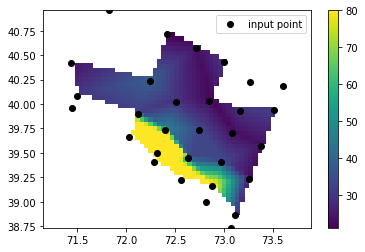

In [159]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon

y = cplat

z = cp

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

plt.pcolormesh(X, Y, Z,vmax = 80 )#shading='auto'

plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

In [160]:
import cartopy.crs as ccrs
import cartopy

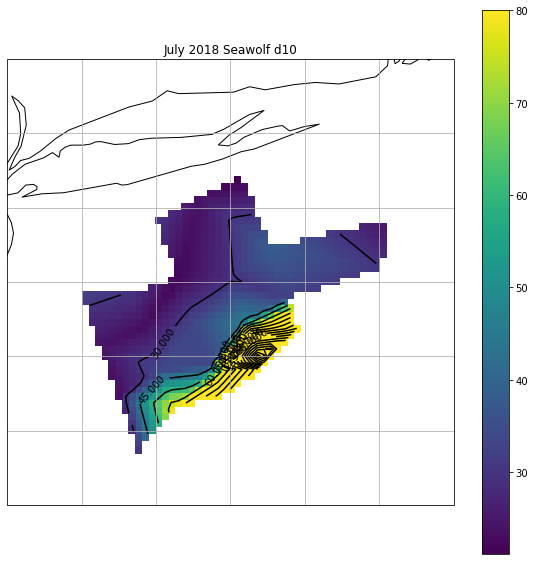

In [201]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [286,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C = ax.pcolormesh(360-X, Y, Z,vmax = 80)
C2 = ax.contour(360-X, Y, Z,20,colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
plt.title('July 2018 Seawolf d10')
plt.colorbar(C)
plt.clabel(C2)
